# Fleet Maintenance

### Python Package Imports

In [20]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import matplotlib.pyplot as plt 
plt.rc("font", size=14)

import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

import sasctl.pzmm as pzmm
from sasctl import Session
from sasctl.services import model_repository as modelRepo
from sasctl.utils import astore

### Import and Review Dataset

In [2]:
fleetData = pd.read_csv('data/fleet_maintenance.csv',sep= ',')
fleetData.shape

(8307, 40)

In [3]:
fleetData.head()

,Maintenance_flag,Speed_sensor,Vibration,Engine_Load,Coolant_Temp,Intake_Pressure,Engine_RPM,Speed_OBD,Intake_Air,Flow_Rate,...,CO2_emission,Fuel_level,Oil_life,Vibration_alert,VibrationAlert_Total,Vibration_Recent,Turbo_alert,Emission_alert,Fog_control,Engine_control
0,0,35,249.188875,21.568628,88,116,1115.5,35,10,18.33,...,0,0,0,1,123,12,1,1,1,1
1,0,142,243.236572,20.392157,88,135,1782.5,142,16,35.41,...,0,0,0,1,123,12,1,1,1,1
2,0,128,244.015378,43.529410,81,109,1588.0,128,9,27.08,...,0,0,0,1,123,12,1,1,1,1
3,0,117,244.627297,99.607840,89,128,1899.5,117,13,36.99,...,0,0,0,1,123,12,1,1,1,1
4,0,98,245.684248,73.333336,89,123,1230.5,98,9,21.63,...,0,0,0,1,123,12,1,1,1,1


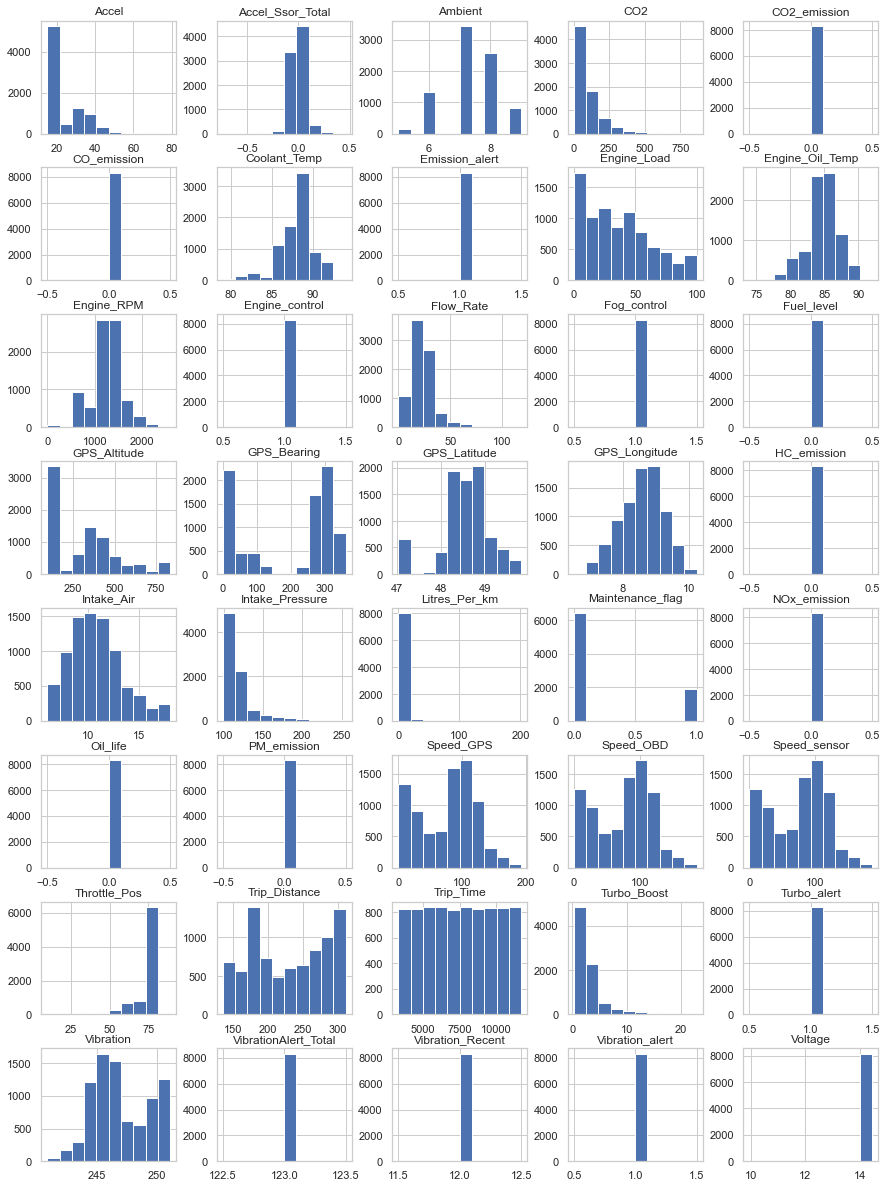

In [4]:
fleetData.hist(figsize=(15,75), layout=(28, 5));

In [5]:
fleetData.columns

Index(['Maintenance_flag', 'Speed_sensor', 'Vibration', 'Engine_Load',
       'Coolant_Temp', 'Intake_Pressure', 'Engine_RPM', 'Speed_OBD',
       'Intake_Air', 'Flow_Rate', 'Throttle_Pos', 'Voltage', 'Ambient',
       'Accel', 'Engine_Oil_Temp', 'Speed_GPS', 'GPS_Longitude',
       'GPS_Latitude', 'GPS_Bearing', 'GPS_Altitude', 'Turbo_Boost',
       'Trip_Distance', 'Litres_Per_km', 'Accel_Ssor_Total', 'CO2',
       'Trip_Time', 'CO_emission', 'HC_emission', 'PM_emission',
       'NOx_emission', 'CO2_emission', 'Fuel_level', 'Oil_life',
       'Vibration_alert', 'VibrationAlert_Total', 'Vibration_Recent',
       'Turbo_alert', 'Emission_alert', 'Fog_control', 'Engine_control'],
      dtype='object')

### Preprocess Data

In [6]:
predictorColumns = ['Speed_sensor', 'Vibration', 'Engine_Load', 'Coolant_Temp', 'Intake_Pressure', 'Engine_RPM', 'Speed_OBD',
       'Intake_Air', 'Flow_Rate', 'Throttle_Pos', 'Voltage', 'Ambient', 'Accel', 'Engine_Oil_Temp', 'Speed_GPS', 
       'GPS_Longitude', 'GPS_Latitude', 'GPS_Bearing', 'GPS_Altitude', 'Turbo_Boost', 'Trip_Distance', 'Litres_Per_km',
       'Accel_Ssor_Total', 'CO2', 'Trip_Time', 'CO_emission', 'HC_emission', 'PM_emission', 'NOx_emission', 'CO2_emission',
       'Fuel_level', 'Oil_life', 'Vibration_alert', 'VibrationAlert_Total', 'Vibration_Recent', 'Turbo_alert', 
       'Emission_alert', 'Fog_control', 'Engine_control']

targetColumn = 'Maintenance_flag'
x = fleetData[predictorColumns]
y = fleetData[targetColumn]

xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.3, random_state=42)

# For missing values, impute the dataset's mean value
xTest.fillna(xTest.mean(), inplace=True)
xTrain.fillna(xTrain.mean(), inplace=True)

### Create, Train, and Assess Model

In [7]:
clf = DecisionTreeClassifier(random_state=42)
clf = clf.fit(xTrain, yTrain)
print(clf)

DecisionTreeClassifier(random_state=42)


In [8]:
# Show features ranked by importance
for importance, name in sorted(zip(clf.feature_importances_, xTrain.columns), 
                               reverse=True):
    print(name, '|', np.round(importance*100, 2), '%')

Trip_Distance | 17.33 %
Speed_GPS | 14.07 %
GPS_Longitude | 8.95 %
Trip_Time | 8.6 %
Accel_Ssor_Total | 6.2 %
Engine_RPM | 4.59 %
GPS_Altitude | 4.28 %
GPS_Bearing | 4.0 %
Flow_Rate | 3.86 %
Engine_Load | 3.59 %
Litres_Per_km | 2.82 %
GPS_Latitude | 2.74 %
CO2 | 2.61 %
Speed_sensor | 2.45 %
Voltage | 2.23 %
Ambient | 2.05 %
Throttle_Pos | 1.73 %
Accel | 1.59 %
Turbo_Boost | 1.31 %
Speed_OBD | 1.2 %
Intake_Pressure | 1.14 %
Coolant_Temp | 1.14 %
Vibration | 0.67 %
Intake_Air | 0.58 %
Engine_Oil_Temp | 0.29 %
Vibration_alert | 0.0 %
Vibration_Recent | 0.0 %
VibrationAlert_Total | 0.0 %
Turbo_alert | 0.0 %
PM_emission | 0.0 %
Oil_life | 0.0 %
NOx_emission | 0.0 %
HC_emission | 0.0 %
Fuel_level | 0.0 %
Fog_control | 0.0 %
Engine_control | 0.0 %
Emission_alert | 0.0 %
CO_emission | 0.0 %
CO2_emission | 0.0 %


In [9]:
yPredict = clf.predict(xTest)
print(confusion_matrix(yTest, yPredict))
print(classification_report(yTest, yPredict))

[[1705  233]
 [ 228  327]]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      1938
           1       0.58      0.59      0.59       555

    accuracy                           0.82      2493
   macro avg       0.73      0.73      0.73      2493
weighted avg       0.82      0.82      0.82      2493



In [10]:
score = clf.score(xTest, yTest)
print(score)

0.8150822302446851


### Register Model in SAS Model Manager or SAS Open Model Manager with pzmm

In [12]:
modelPrefix = 'FleetDecisionTree'
zipFolder = Path.cwd() / 'data/FleetMaintenanceModels/Sklearn_DecisionTree/'

pzmm.PickleModel.pickleTrainedModel(clf, modelPrefix, zipFolder)

In [13]:
JSONFiles = pzmm.JSONFiles()

JSONFiles.writeVarJSON(fleetData[predictorColumns], isInput=True, jPath=zipFolder)

outputVar = pd.DataFrame(columns=['EM_EVENTPROBABILITY', 'EM_CLASSIFICATION'])
outputVar['EM_CLASSIFICATION'] = yTrain.astype('category').cat.categories.astype('str')
outputVar['EM_EVENTPROBABILITY'] = 0.5
JSONFiles.writeVarJSON(outputVar, isInput=False, jPath=zipFolder)

modelName = 'Truck Fleet'
JSONFiles.writeModelPropertiesJSON(modelName=modelName,
                                   modelDesc='',
                                   targetVariable=targetColumn,
                                   modelType='Classification Decision Tree',
                                   modelPredictors=predictorColumns,
                                   targetEvent=1,
                                   numTargetCategories=1,
                                   eventProbVar='EM_EVENTPROBABILITY',
                                   jPath=zipFolder,
                                   modeler='sasdemo')

JSONFiles.writeFileMetadataJSON(modelPrefix, jPath=zipFolder)

In [14]:
targetName = targetColumn
targetValue = 1
data = [(yTest, yPredict),
        (None, None),
        (None, None)]
JSONFiles = pzmm.JSONFiles()
JSONFiles.calculateFitStat(data, zipFolder)
JSONFiles.generateROCStat(data, targetName, zipFolder)
JSONFiles.generateLiftStat(data, targetName, targetValue, zipFolder)

In [15]:
ScoreCode = pzmm.ScoreCode()
ScoreCode.writeScoreCode(x, y, modelPrefix,
                         '{}.predict({})', modelPrefix + '.pickle',
                         pyPath=zipFolder)

In [19]:
zipIOFile = pzmm.ZipModel.zipFiles(fileDir=zipFolder, modelPrefix=modelPrefix)
with Session(hostname='sasdemo.server.com',
             username='sasdemo', password='sasdemo'):
    model = modelRepo.import_model_from_zip(modelPrefix,
                                            'FleetManagement',
                                            zipIOFile)